# 線形モデルと非線形モデルの違い(複雑なデータ編)

## このNotebookのねらい
- 線形モデルと非線形モデルの違いを理解する
    - 観点1: モデルごとのスコアの違い(訓練スコアと検証スコア)
    - 観点2: 決定境界の違い
- モデルごとに過学習のしやすさに違いがあることを知る

## このNotebookで重要じゃないこと
- モデルの数理的理解

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

# 関数の準備

In [2]:
def plot_decision_boundary(model, X):
    x1 = np.linspace(X[:, 0].min() - 0.5,
                     X[:, 0].max() + 0.5,
                     num=200)

    x2 = np.linspace(X[:, 1].min() - 0.5,
                     X[:, 1].max() + 0.5,
                     num=200)

    x1, x2 = np.meshgrid(x1, x2)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape(200, 200)

    plt.contourf(x1, x2, y_pred, alpha=.2, cmap="spring")
    plt.title(model.__class__.__name__)

In [3]:
def plot_data(X, y):
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.show()

In [4]:
from sklearn.model_selection import train_test_split


def train(model, X, y):
    """訓練およびTrainとValidのAccuracyを出力する関数"""
    X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                          train_size=0.70, random_state=0)

    model.fit(X_train, y_train)

    acc_train = model.score(X_train, y_train)
    acc_valid = model.score(X_valid, y_valid)

    model_name = model.__class__.__name__
    print(f'[{model_name}] Train Accuracy: {acc_train:.3f}')
    print(f'[{model_name}] Valid Accuracy: {acc_valid:.3f}')

    return model

# データの準備
- シンプルな2次元のデータ

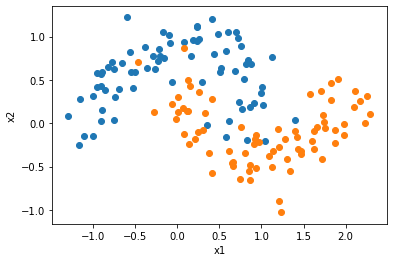

In [5]:
from sklearn.datasets import make_moons

# noiseを大きくすると(小さくすると)どうなるでしょう？
moons = make_moons(n_samples=150, noise=0.20, random_state=0)

X = moons[0]
y = moons[1]

plot_data(X, y)

## LogisticRegression

[LogisticRegression] Train Accuracy: 0.829
[LogisticRegression] Valid Accuracy: 0.800


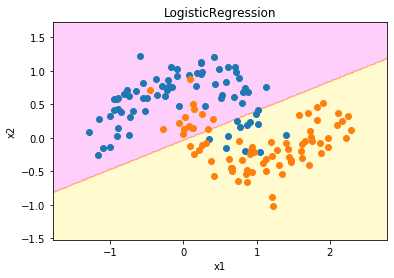

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = train(LogisticRegression(), X, y)

plot_decision_boundary(logreg, X)

plot_data(X, y)

## KNearestNeighbor

[KNeighborsClassifier] Train Accuracy: 0.952
[KNeighborsClassifier] Valid Accuracy: 0.911


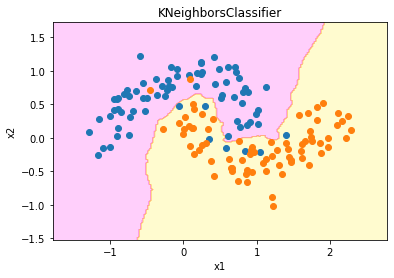

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = train(KNeighborsClassifier(n_neighbors=5), X, y)

plot_decision_boundary(knn, X)

plot_data(X, y)

## SupportVectorMachine

[SVC] Train Accuracy: 0.943
[SVC] Valid Accuracy: 0.911


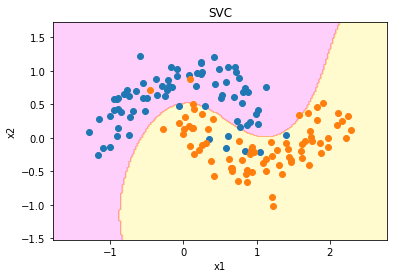

In [8]:
from sklearn.svm import SVC

svm = train(SVC(C=10), X, y)

plot_decision_boundary(svm, X)

plot_data(X, y)

## DecisionTree(決定木)

[DecisionTreeClassifier] Train Accuracy: 1.000
[DecisionTreeClassifier] Valid Accuracy: 0.867


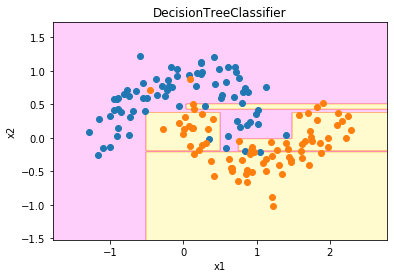

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree = train(DecisionTreeClassifier(random_state=0), X, y)

plot_decision_boundary(tree, X)

plot_data(X, y)

## RandomForestClassifier

[RandomForestClassifier] Train Accuracy: 0.990
[RandomForestClassifier] Valid Accuracy: 0.867


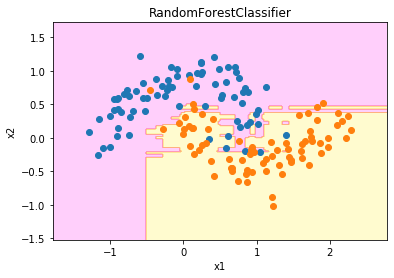

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = train(RandomForestClassifier(random_state=0), X, y)

plot_decision_boundary(forest, X)

plot_data(X, y)

おわり